In [75]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [76]:
from tabGAN import TabGAN
from src import constants as const
import helpers
from v2_hp_tuning import fetch_hp_info

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [77]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [78]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

METHOD_NAME = "ctabGAN-qtr"
hp_info = fetch_hp_info(method=METHOD_NAME)

In [79]:
def plot_hp_tuning(hp_name, allow_not_complete_hp_vec=True, n_synthetic_datasets=None, **kwargs):
    curr_image_dir = os.path.join(const.dir.images_hp_v2(), METHOD_NAME)
    curr_hp_info = hp_info[hp_name]
    if n_synthetic_datasets is None:
        n_synthetic_datasets = curr_hp_info["n_synthetic_datasets"]
    result = helpers.hp_tuning.evaluate_hyperparams_through_prediction(
        data_train=data_train, 
        data_test=data_test,
        dataset_dir=const.dir.hp_tuning_v2(),
        hyperparams_vec=curr_hp_info["vec"],
        hyperparams_name = hp_name,
        hyperparams_subname = curr_hp_info["hyperparams_subname"],
        subfolder=METHOD_NAME,
        n_synthetic_datasets = n_synthetic_datasets,
        save_dir = const.dir.images_hp_v2(),
        save_path = f"predictive_performance_against_{hp_name}.svg",
        incl_comparison_folder=True,
        allow_not_complete_hp_vec=allow_not_complete_hp_vec,
        **kwargs
    )
    return result

  0%|          | 0/200 [00:00<?, ?it/s]

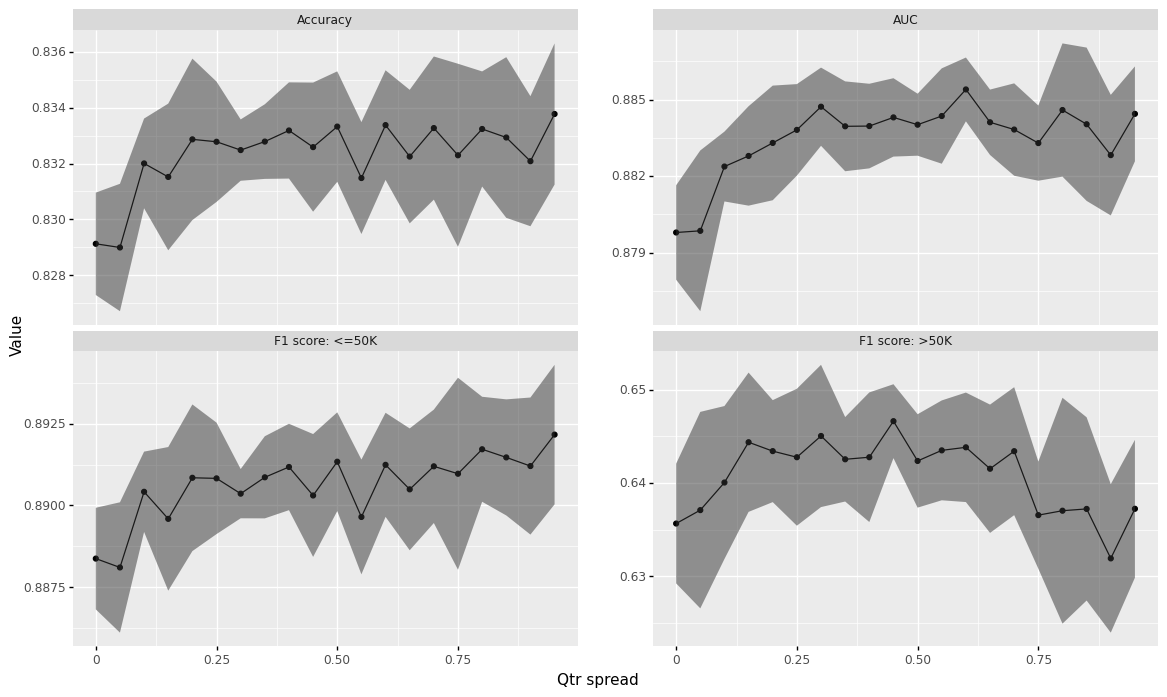

In [81]:
result_qtr_spread = plot_hp_tuning("qtr_spread")

In [82]:
result_qtr_spread

,Qtr spread,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.00,0.829124,0.879786,0.762018,0.888373,0.635664,0.001836,0.001853,0.003160,0.001554,0.006411
1,0.05,0.828991,0.879852,0.762601,0.888102,0.637100,0.002284,0.003155,0.005096,0.001994,0.010523
2,0.10,0.832005,0.882376,0.765237,0.890416,0.640057,0.001609,0.001371,0.004073,0.001229,0.008192
3,0.15,0.831521,0.882792,0.766980,0.889588,0.644373,0.002630,0.001951,0.003809,0.002197,0.007459
4,0.20,0.832869,0.883303,0.767132,0.890845,0.643420,0.002894,0.002250,0.003293,0.002243,0.005462
5,0.25,0.832782,0.883815,0.766796,0.890827,0.642766,0.002158,0.001797,0.003768,0.001705,0.007334
6,0.30,0.832483,0.884724,0.767702,0.890359,0.645044,0.001100,0.001535,0.003758,0.000753,0.007618
7,0.35,0.832789,0.883955,0.766702,0.890859,0.642546,0.001338,0.001764,0.002078,0.001256,0.004524
8,0.40,0.833187,0.883964,0.766971,0.891175,0.642766,0.001725,0.001661,0.003533,0.001321,0.006941
9,0.45,0.832590,0.884304,0.768466,0.890303,0.646628,0.002315,0.001538,0.002334,0.001879,0.003957


In [67]:
result_noise_ctgan = plot_hp_tuning("noise_ctgan", n_s)

TypeError: '<' not supported between instances of 'str' and 'float'

In [ ]:
result_noise_ctgan

  0%|          | 0/170 [00:00<?, ?it/s]

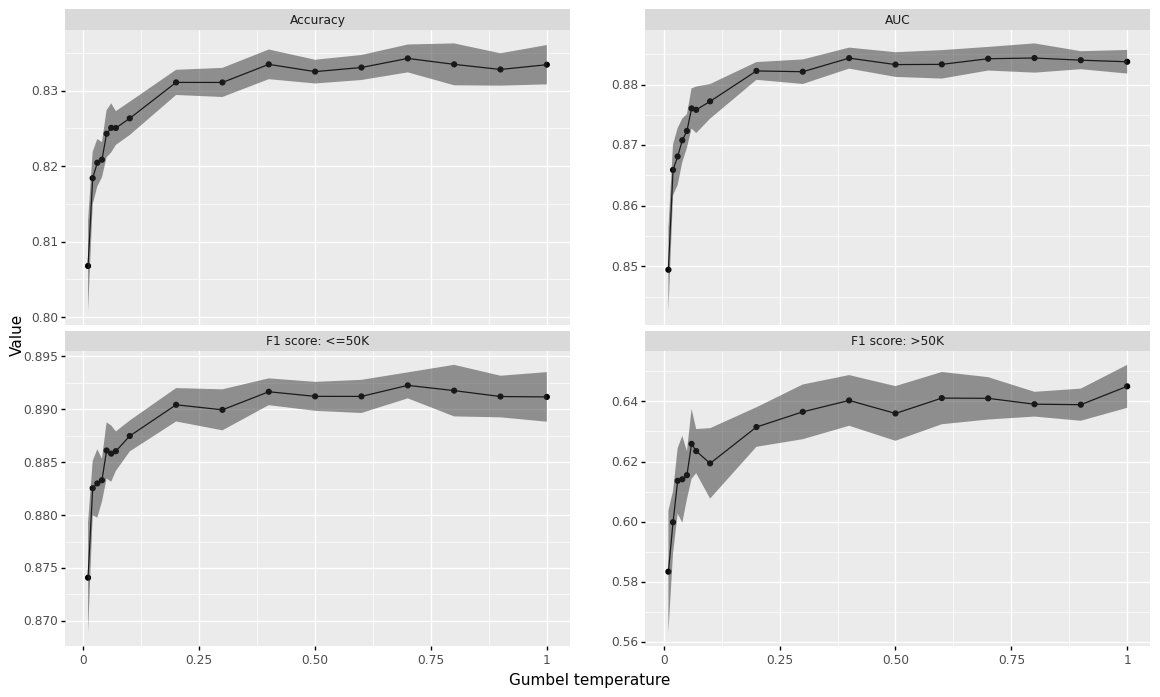

In [83]:
result_gumbel_temperature = plot_hp_tuning("gumbel_temperature")

In [84]:
result_gumbel_temperature

,Gumbel temperature,Value Accuracy,Value AUC,Value F1,Value F1_0,Value F1_1,SD Accuracy,SD AUC,SD F1,SD F1_0,SD F1_1
0,0.01,0.806786,0.849424,0.728738,0.874086,0.583390,0.005986,0.006841,0.009922,0.005190,0.020260
1,0.02,0.818420,0.865902,0.741183,0.882543,0.599822,0.003483,0.004199,0.005581,0.002573,0.010334
2,0.03,0.820465,0.868121,0.748296,0.882996,0.613595,0.003136,0.004705,0.004471,0.003228,0.010885
3,0.04,0.820863,0.870794,0.748699,0.883301,0.614098,0.002334,0.003596,0.006918,0.002030,0.014409
4,0.05,0.824303,0.872334,0.750788,0.886110,0.615467,0.003120,0.002778,0.003981,0.002656,0.007982
5,0.06,0.825080,0.876058,0.755843,0.885814,0.625871,0.003247,0.003312,0.005871,0.002658,0.011632
6,0.07,0.825060,0.875827,0.754753,0.886042,0.623464,0.002237,0.003846,0.003673,0.001867,0.007339
7,0.10,0.826341,0.877223,0.753432,0.887481,0.619384,0.002205,0.002856,0.005954,0.001462,0.011699
8,0.20,0.831102,0.882247,0.760947,0.890429,0.631465,0.001667,0.001466,0.003027,0.001579,0.006565
9,0.30,0.831096,0.882115,0.763234,0.889952,0.636517,0.001930,0.002026,0.004125,0.001937,0.009096
